# Introduction to QuTiP
Contact: Nathan Shammah nathan.shammah@gmail.com

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

In [56]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) 2011 and later.
A. J. Pitchford, P. D. Nation, R. J. Johansson, A. Grimsmo, and C. Granade

QuTiP Version:      4.3.1
Numpy Version:      1.15.4
Scipy Version:      1.2.1
Cython Version:     0.29.8
Matplotlib Version: 3.1.0
Python Version:     3.7.3
Number of CPUs:     2
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Darwin (x86_64)
Installation path:  /miniconda3/lib/python3.7/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex file can be easily generated using `qutip.cite()`


## Quantum Objects

### Operators and kets

In [57]:
# Let's define a quantum object. We can start from a simple 
# bosonic destruction operator
n_max = 2
a = destroy(n_max)

In [58]:
a

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[0. 1.]
 [0. 0.]]

In [59]:
# in QuTiP, all number (Fock) states are defined on the "basis". 
psi0 = basis(n_max)

In [60]:
psi0 # it's a ket!

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [61]:
a*psi0 # destroing the ground state gives the vacuum

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [0.]]

In [62]:
a.dag()*psi0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [63]:
psi0 = basis(n_max)
for n in range(1,n_max):
    print("n = ",n)
    psi = a.dag()*psi0/np.sqrt(n)
    print(psi)
    psi0 = psi
psi0 = basis(n_max)

n =  1
Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]


# Density matrix

In [64]:
rho0 = psi0*psi0.dag()
rho0

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [65]:
rho1 = fock(n_max,1)*fock(n_max,1).dag()
rho1

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0. 0.]
 [0. 1.]]

In [66]:
mixed = (rho0 + rho1)/2
mixed

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0. ]
 [0.  0.5]]

In [78]:
# let's define the Schrodinger cat state
cat = fock(n_max,0)+fock(n_max,1)
cat = cat 
cat_rho = ket2dm(cat)/2
cat_rho

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]

In [82]:
# trace Tr[rho]
print(cat_rho.tr())
print(mixed.tr())

1.0
1.0


In [83]:
# purity Tr[rho*rho]
print((cat_rho*cat_rho).tr())
print((mixed*mixed).tr())

1.0
0.5


## Hamiltonian

In [97]:
# We can now build a Hamiltonian, 
# that of the Quantum Harmonic Oscillator 
# exploring its features with QuTiP
n_max = 6
a = destroy(n_max)

H = a.dag()*a

In [98]:
H

Quantum object: dims = [[6], [6]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0.]
 [0. 0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 0. 5.]]

In [99]:
E_n , Psi_n = H.eigenstates()

In [100]:
E_n

array([0., 1., 2., 3., 4., 5.])

In [101]:
Psi_n

array([Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]],
       Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]],
       Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]],
       Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]],
       Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]],
       Quantum object: dims = [[6], [1]], shape = (6, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]], dtype=object)

In [120]:
g = .6
H_driven = a.dag()*a + g*(a + a.dag())
En_driven , Psin_driven = H_driven.eigenstates()

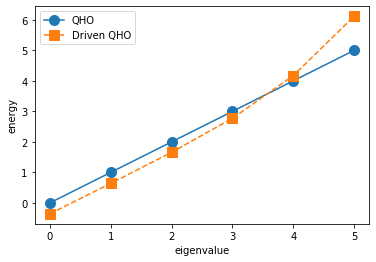

In [137]:
plt.figure()
plt.plot(E_n,"o-",markersize = 10, label="QHO")
plt.plot(En_driven,"s--",markersize = 10, label="Driven QHO")

plt.ylabel("energy")
plt.xlabel("eigenvalue")
plt.legend()
plt.show()
plt.close()

## Open Quantum System: Lindblad Master Equation

\begin{eqnarray}
\partial_t{\rho}&=&-i\lbrack H, \rho\rbrack +\kappa\left(a\rho a^\dagger - a^\dagger a\rho- \rho a^\dagger a\right)\\
\partial_t{\rho}&=&-i\lbrack H, \rho\rbrack +\kappa\mathcal{D}_{[a]}(\rho)
\end{eqnarray}

* Non-unitary dynamics: Non-Hermitian matrix,  $\partial_t{\rho}=\mathcal{L}\rho$
* Contractive map 
* Linear map 
* 

In [153]:
rho0 = ket2dm(basis(n_max,n_max-1))
t = np.linspace(0,30,300)
kappa = 0.3
results = mesolve(H,rho0,t,[kappa*a])
rho_t = results.states
rho_t[0]

rho_t[-1]

Quantum object: dims = [[6], [6]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[7.06203481e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.54400986e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.66579057e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.64111551e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.51406810e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.37141101e-06]]

In [154]:
results = mesolve(H,rho0,t,c_ops=[kappa*a], e_ops=[a,a.dag()*a])
at = results.expect[0]
nt = results.expect[1]

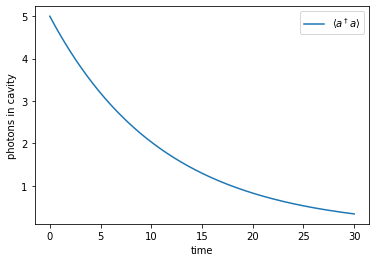

In [156]:
plt.figure()
plt.plot(t,nt,"-",markersize = 10, label="$\\langle a^\dagger a \\rangle$")
plt.ylabel("photons in cavity")
plt.xlabel("time")
plt.legend()
plt.show()
plt.close()

In [90]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) 2011 and later.
A. J. Pitchford, P. D. Nation, R. J. Johansson, A. Grimsmo, and C. Granade

QuTiP Version:      4.3.1
Numpy Version:      1.15.4
Scipy Version:      1.2.1
Cython Version:     0.29.8
Matplotlib Version: 3.1.0
Python Version:     3.7.3
Number of CPUs:     2
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Darwin (x86_64)
Installation path:  /miniconda3/lib/python3.7/site-packages/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex file can be easily generated using `qutip.cite()`
